In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from black import Encoding



warnings.filterwarnings("ignore")

sns.set(style="darkgrid", font_scale=1.5)

pd.set_option("display.max.columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: '%.3f' % x)
pd.set_option('display.width', 1000000)


from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer

ModuleNotFoundError: No module named 'numpy'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from black import Encoding



warnings.filterwarnings("ignore")

sns.set(style="darkgrid", font_scale=1.5)

pd.set_option("display.max.columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: '%.3f' % x)
pd.set_option('display.width', 1000000)


from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer

In [ ]:
data_2017 = pd.read_excel("/Users/gulsah/Desktop/wind_turbines/Wind-Turbine-SCADA-signals-2017_0.xlsx")
data_2016 = pd.read_excel("/Users/gulsah/Desktop/vs code/wind_turbines/adsız klasör/Wind-Turbine-SCADA-signals-2016.xlsx")

df = pd.concat([data_2016, data_2017], axis=0)
df.head(10)

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_ActPwrGen1,Prod_LatestAvg_ActPwrGen2,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_ReactPwrGen2,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_Pwr_Avg,Grd_Prod_CosPhi_Avg,Grd_Prod_Freq_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Prod_CurPhse1_Avg,Grd_Prod_CurPhse2_Avg,Grd_Prod_CurPhse3_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Max,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T06,2016-01-08T23:10:00+00:00,1634.300,1226.900,1416.400,96.400,49.000,62,63,64,30,52,57,31,14.500,10.800,12.500,11.300,2.800,6.500,1.100,-9.400,197.600,18,0,82204.000,0,82204.000,0,-24066,0,-24066,55,59,56,39,41,27,41,27,19,-2.400,-0.900,-1.900,0.400,104,40,40,38,38,491.900,1.000,49.900,399.500,397.600,397.600,417.900,445.900,423.200,796.100,141.300,41,0.800,6.600,132.400,-144.400,-131.900,-162.200,6.100,490.900,810.400,132.500,133.000,-998.700,-649.200,-1000.000,18.500,998.700,1000.000,649.200,18.500,40,207.100
1,T06,2016-04-19T12:20:00+00:00,1796.100,1597.000,1680.000,29.800,66.000,97,107,111,43,54,62,34,15.800,14.200,14.900,21.900,2.900,12.100,2.500,7.500,137.400,17,0,331405.000,0,331405.000,0,-36814,0,-36814,79,86,85,46,43,27,41,38,21,-1.500,11.900,4.300,3.200,125,48,48,46,42,1988.100,1.000,50.000,399.200,397.100,398.200,1667.800,1693.300,1658.100,2103.300,1665.800,47,0.200,12.200,54.700,-220.900,-215.600,-225.400,2.100,1982.300,2000.000,1622.400,52.700,-615.200,-583.300,-1000.000,91.900,423.800,783.500,406.100,52.700,57,129.900
2,T01,2016-01-08T23:10:00+00:00,1657.500,1299.200,1495.000,83.800,47.000,62,62,61,29,49,54,26,14.700,11.500,13.200,13.400,1.300,7.100,1.200,-19.300,201.200,18,0,98177.000,0,98177.000,0,-24113,0,-24113,70,79,68,39,40,27,43,27,19,-2.400,-1.200,-2.000,0.300,98,39,39,38,38,588.200,1.000,49.900,400.400,398.500,398.800,489.200,521.600,498.600,1054.100,298.000,39,0.700,7.000,144.400,-144.400,-131.300,-162.100,6.100,588.100,1075.100,275.000,145.000,-1000.000,-1000.000,-1000.000,0.000,1000.000,1000.000,1000.000,0.000,49,220.600
3,T11,2016-04-19T12:30:00+00:00,1771.200,1590.000,1677.500,29.400,66.000,111,110,110,50,59,68,31,15.700,14.100,14.900,25.000,2.100,11.800,2.400,-1.300,122.200,17,0,326317.000,0,326317.000,0,-36349,0,-36349,81,97,87,49,46,28,47,40,21,-2.400,12.000,3.600,3.300,116,49,51,50,44,1958.200,1.000,50.000,399.200,396.200,398.200,1633.400,1669.700,1642.700,2106.700,1220.000,48,0.200,12.000,136.100,-218.100,-212.300,-222.600,2.400,1951.600,2000.000,1142.900,136.000,-639.600,-583.300,-1000.000,132.400,452.200,1000.000,406.100,125.100,56,123.500
4,T07,2016-01-08T23:50:00+00:00,1667.500,1277.400,1481.300,119.100,46.000,73,72,71,30,57,60,27,14.800,11.300,13.100,18.100,0.700,7.200,1.700,15.600,221.700,18,0,114924.000,0,114924.000,0,-26293,0,-26293,78,82,82

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Değişken tiplerini gruplandırma
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

df['Prod_LatestAvg_ActPwrGen2'].nunique()
df["Prod_LatestAvg_ReactPwrGen2"].nunique()

#İki değişkenin yalnızca 1 değeri olduğu için bu değişkenleri siliyoruz
df = df.drop(['Prod_LatestAvg_ActPwrGen2',"Prod_LatestAvg_ReactPwrGen2"], axis=1)
df.shape  # (417137, 81)

cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")


## 2- Aykırı değerler

def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1) #Q1 value calculation
    quartile3 = dataframe[col_name].quantile(q3) #Q3 value calculation
    interquartile_range = quartile3 - quartile1 #IQR calculation
    up_limit = quartile3 + 1.5 * interquartile_range #determination of the upper limit
    low_limit = quartile1 - 1.5 * interquartile_range #determination of the lower limit
    return low_limit, up_limit
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)  # Alt ve üst limitlerin belirlenmesi

    ## Gözlem sayısı 10'dan büyükse ilk 5 gözlemi alın
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    # Eğer değilse hepsini getir
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index



def count_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    return outliers.shape[0]

for col in num_cols:
    print(col, count_outliers(df, col))

# Aykırı değeri olan sütunları ve aykırı değer sayılarını saklayan sözlük
outlier_counts = {col: count_outliers(df, col) for col in num_cols if col in df.columns and check_outlier(df, col)}
outlier_counts

# Sözlüğü aykırı değer sayılarına göre azalan sırada sıralayın
sorted_outlier_counts = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)

#aykırı değer olan değişkenler
outlier_columns = [col for col in num_cols if check_outlier(df, col)]

Observations: 417137
Variables: 83
cat_cols: 5
num_cols: 77
cat_but_car: 1
num_but_cat: 4
#############
Cat_Cols : ['Turbine_ID', 'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_ReactPwrGen2', 'Grd_Prod_CosPhi_Avg', 'Grd_Prod_Freq_Avg']
#############
Num_Cols : ['Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg', 'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg', 'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg', 'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max', 'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std', 'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg', 'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1', 'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1', 'Prod_LatestAvg_TotReactPwr', 'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg', 'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg', 'Cont_Top_Temp_Avg', 'Con

In [ ]:
#aykırı değerleri baskılama
def replace_with_thresholds(dataframe, variable): #aykırı değerleri baskılama
    low_limit, up_limit = outlier_thresholds(dataframe, variable) #alt ve üst limiti hesaplama
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit #alt limitten küçük olanların yerine alt limiti atama
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit #üst limitten büyük olanların yerine üst limiti atama

for col in outlier_columns:
    replace_with_thresholds(df, col)

#aykırı değerleri tekrardan kontrol
for col in num_cols:
    print(col, check_outlier(df, col))

Gen_RPM_Max False
Gen_RPM_Min False
Gen_RPM_Avg False
Gen_RPM_Std False
Gen_Bear_Temp_Avg False
Gen_Phase1_Temp_Avg False
Gen_Phase2_Temp_Avg False
Gen_Phase3_Temp_Avg False
Hyd_Oil_Temp_Avg False
Gear_Oil_Temp_Avg False
Gear_Bear_Temp_Avg False
Nac_Temp_Avg False
Rtr_RPM_Max False
Rtr_RPM_Min False
Rtr_RPM_Avg False
Amb_WindSpeed_Max False
Amb_WindSpeed_Min False
Amb_WindSpeed_Avg False
Amb_WindSpeed_Std False
Amb_WindDir_Relative_Avg False
Amb_WindDir_Abs_Avg False
Amb_Temp_Avg False
Prod_LatestAvg_ActPwrGen0 False
Prod_LatestAvg_ActPwrGen1 False
Prod_LatestAvg_TotActPwr False
Prod_LatestAvg_ReactPwrGen0 False
Prod_LatestAvg_ReactPwrGen1 False
Prod_LatestAvg_TotReactPwr False
HVTrafo_Phase1_Temp_Avg False
HVTrafo_Phase2_Temp_Avg False
HVTrafo_Phase3_Temp_Avg False
Grd_InverterPhase1_Temp_Avg False
Cont_Top_Temp_Avg False
Cont_Hub_Temp_Avg False
Cont_VCP_Temp_Avg False
Gen_SlipRing_Temp_Avg False
Spin_Temp_Avg False
Blds_PitchAngle_Min False
Blds_PitchAngle_Max False
Blds_PitchAngle_A

In [ ]:
correlations = df[num_cols].corr()["Prod_LatestAvg_TotActPwr"].sort_values(ascending=False)

In [ ]:
high_corr = correlations[correlations > 0.91].index

In [ ]:
high_corr = high_corr.drop("Prod_LatestAvg_TotActPwr")

In [ ]:
#yüksek korelasyon olan değişkenleri silme
df = df.drop(columns=high_corr)
df.shape #417137, 72

(417137, 72)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#############")
print(f"Cat_Cols : {cat_cols}") #['Turbine_ID', 'Grd_Prod_CosPhi_Avg', 'Grd_Prod_Freq_Avg']
print("#############")
print(f"Num_Cols : {num_cols}") #68 tane var
print("#############")
print(f"Cat_But_Car : {cat_but_car}") #['Timestamp']


#korelasyon kısmında hedef değişkenle korelasyonu 0.91 den büyük ollan değişkenler silindi
#korelasyon matrisi

df_ = df.copy()

Observations: 417137
Variables: 72
cat_cols: 3
num_cols: 68
cat_but_car: 1
num_but_cat: 2
#############
Cat_Cols : ['Turbine_ID', 'Grd_Prod_CosPhi_Avg', 'Grd_Prod_Freq_Avg']
#############
Num_Cols : ['Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg', 'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg', 'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg', 'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max', 'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std', 'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg', 'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1', 'Prod_LatestAvg_TotReactPwr', 'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg', 'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg', 'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg', 'Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg', 'Blds_Pit

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#veriyi zamana göre sıralama
df =  df.sort_values("Timestamp")
df.head()

df['year'] = df['Timestamp'].dt.year #yıl
df['month'] = df['Timestamp'].dt.month #ay
df['day'] = df['Timestamp'].dt.day # gün
df['dayofweek'] = df['Timestamp'].dt.dayofweek#haftanın günü
df['hour'] = df['Timestamp'].dt.hour #saat
df['weekofyear'] = df['Timestamp'].dt.isocalendar().week # yılın haftası

c_cols =["year", "month", "day", "dayofweek", "hour", "weekofyear"]

cat_cols.extend(c_cols)

In [ ]:
def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))


def lag_features(dataframe, feature, lags, group_cols):
    if not group_cols:
        raise ValueError("Gruplama sütunları (group_cols) belirtilmelidir.")

    for lag in lags:
        dataframe[f'{feature}_lag_{lag}'] = (
                dataframe.groupby(group_cols)[feature].transform(lambda x: x.shift(lag)) + random_noise(dataframe))
    return dataframe

df = lag_features(df,"Prod_LatestAvg_TotActPwr", lags=[30,37,44,53,60,67,74,81,162,324,648], group_cols="Turbine_ID")
df.head()

#eksik değerleri temizleme
df = df.dropna()
df.isnull().sum().sum()


# dönemsellikleri yakalamak için sinüs ve kosinüs dönüşümleri kulanma
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


# sinüs ve kosinüs dönüşümü
df["Amb_WindDir_Abs_Sin"] = np.sin(np.radians(df["Amb_WindDir_Abs_Avg"]))
df["Amb_WindDir_Abs_Cos"] = np.cos(np.radians(df["Amb_WindDir_Abs_Avg"]))

df.shape #(414545, 95)

(414545, 95)

In [ ]:
cat_cols.remove('Turbine_ID')
cat_cols

df = pd.get_dummies(df,columns=cat_cols,drop_first=True)
df.head()
df.shape
df.info

for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].apply(lambda x: 1 if x == True else 0) 


data = df.copy()
df.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Prod_LatestAvg_TotActPwr_lag_30,Prod_LatestAvg_TotActPwr_lag_37,Prod_LatestAvg_TotActPwr_lag_44,Prod_LatestAvg_TotActPwr_lag_53,Prod_LatestAvg_TotActPwr_lag_60,Prod_LatestAvg_TotActPwr_lag_67,Prod_LatestAvg_TotActPwr_lag_74,Prod_LatestAvg_TotActPwr_lag_81,Prod_LatestAvg_TotActPwr_lag_162,Prod_LatestAvg_TotActPwr_lag_324,Prod_LatestAvg_TotActPwr_lag_648,hour_sin,hour_cos,month_sin,month_cos,Amb_WindDir_Abs_Sin,Amb_WindDir_Abs_Cos,Grd_Prod_CosPhi_Avg_0.3,Grd_Prod_CosPhi_Avg_0.4,Grd_Prod_CosPhi_Avg_0.5,Grd_Prod_CosPhi_Avg_0.6000000000000001,Grd_Prod_CosPhi_Avg_0.7000000000000001,Grd_Prod_CosPhi_Avg_0.8,Grd_Prod_CosPhi_Avg_0.9,Grd_Prod_CosPhi_Avg_1.0,Grd_Prod_Freq_Avg_48.8,Grd_Prod_Freq_Avg_49.6,Grd_Prod_Freq_Avg_49.9,Grd_Prod_Freq_Avg_50.0,Grd_Prod_Freq_Avg_50.1,year_2017,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52
117604,T06,2016-01-05 12:00:00+00:00,1688.500,1345.500,1589.300,67.100,47.000,64,65,65,31,55,59,26,14.900,11.900,14.100,14.500,2.100,8.100,1.600,-17.700,307.400,15,0,164178.000,0,-30258,-30258.000,63,68,65,35,38,24,39,26.000,17,-2.400,-0.500,-2.100,0.300,104,37.000,37,35.000,33,399.100,397.400,398.200,40,0.600,8.300,279.300,-181.600,-165.800,-199.000,8.800,474.500,279.600,-1000.000,-1000.000,-1000.000,0.000,990.100,1000.000,677.200,39.700,35,325.200,244631.658,121781.738,320649.524,330271.097,321475.736,318120.307,279404.028,153571.905,267171.716,-698.227,10466.700,0.000,-

In [ ]:
df_t01 = df[df["Turbine_ID"] == "T01"]
df_t06 = df[df["Turbine_ID"] == "T06"]
df_t07 = df[df["Turbine_ID"] == "T07"]
df_t11 = df[df

SyntaxError: incomplete input (<ipython-input-15-b62445c9f3b0>, line 4)

In [ ]:
df_t01 = df[df["Turbine_ID"] == "T01"]
df_t06 = df[df["Turbine_ID"] == "T06"]
df_t07 = df[df["Turbine_ID"] == "T07"]
df_t11 = df[df["Turbine_ID"] == "T11"]

In [ ]:
df_t01.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Prod_LatestAvg_TotActPwr_lag_30,Prod_LatestAvg_TotActPwr_lag_37,Prod_LatestAvg_TotActPwr_lag_44,Prod_LatestAvg_TotActPwr_lag_53,Prod_LatestAvg_TotActPwr_lag_60,Prod_LatestAvg_TotActPwr_lag_67,Prod_LatestAvg_TotActPwr_lag_74,Prod_LatestAvg_TotActPwr_lag_81,Prod_LatestAvg_TotActPwr_lag_162,Prod_LatestAvg_TotActPwr_lag_324,Prod_LatestAvg_TotActPwr_lag_648,hour_sin,hour_cos,month_sin,month_cos,Amb_WindDir_Abs_Sin,Amb_WindDir_Abs_Cos,Grd_Prod_CosPhi_Avg_0.3,Grd_Prod_CosPhi_Avg_0.4,Grd_Prod_CosPhi_Avg_0.5,Grd_Prod_CosPhi_Avg_0.6000000000000001,Grd_Prod_CosPhi_Avg_0.7000000000000001,Grd_Prod_CosPhi_Avg_0.8,Grd_Prod_CosPhi_Avg_0.9,Grd_Prod_CosPhi_Avg_1.0,Grd_Prod_Freq_Avg_48.8,Grd_Prod_Freq_Avg_49.6,Grd_Prod_Freq_Avg_49.9,Grd_Prod_Freq_Avg_50.0,Grd_Prod_Freq_Avg_50.1,year_2017,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52
150648,T01,2016-01-05 12:00:00+00:00,1693.700,1315.100,1578.200,97.000,47.000,74,72,71,30,56,60,26,15.000,11.600,14.000,20.700,0.500,8.300,2.000,14.900,354.000,15,0,162155.000,0,-30253,-30253.000,57,74,75,36,36,25,37,28.000,17,-2.400,-0.600,-2.000,0.400,94,37.000,37,36.000,34,399.900,398.200,400.500,34,0.900,8.200,377.000,-181.600,-165.600,-199.100,8.800,200.300,379.600,-999.200,-865.200,-1000.000,8.000,980.900,1000.000,554.100,72.500,43,339.100,263296.940,126523.690,328899.787,328849.572,329377.645,331043.214,297451.760,211111.594,288124.130,-678.309,4311.005,0.000,-1.000

In [ ]:
df_t01.shape

(104034, 222)

In [ ]:
def roll_mean_features(dataframe, windows, group_cols, target_col):

SyntaxError: incomplete input (<ipython-input-19-3366609d57b9>, line 1)

In [ ]:
def roll_mean_features(dataframe, windows, group_cols, target_col):
    for window in windows:
        col_name = f'{target_col}_roll_mean_{window}'
        dataframe[col_name] = dataframe.groupby(group_cols)[target_col].transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10).mean()
        )
    return dataframe

df = roll_mean_features(df, windows=[24, 168, 720], group_cols=['Turbine_ID'], target_col='Prod_LatestAvg_TotActPwr')

df.head()
df= df.dropna()

df =  df.sort_values("Timestamp")

In [ ]:
df.tail()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Prod_LatestAvg_TotActPwr_lag_30,Prod_LatestAvg_TotActPwr_lag_37,Prod_LatestAvg_TotActPwr_lag_44,Prod_LatestAvg_TotActPwr_lag_53,Prod_LatestAvg_TotActPwr_lag_60,Prod_LatestAvg_TotActPwr_lag_67,Prod_LatestAvg_TotActPwr_lag_74,Prod_LatestAvg_TotActPwr_lag_81,Prod_LatestAvg_TotActPwr_lag_162,Prod_LatestAvg_TotActPwr_lag_324,Prod_LatestAvg_TotActPwr_lag_648,hour_sin,hour_cos,month_sin,month_cos,Amb_WindDir_Abs_Sin,Amb_WindDir_Abs_Cos,Grd_Prod_CosPhi_Avg_0.3,Grd_Prod_CosPhi_Avg_0.4,Grd_Prod_CosPhi_Avg_0.5,Grd_Prod_CosPhi_Avg_0.6000000000000001,Grd_Prod_CosPhi_Avg_0.7000000000000001,Grd_Prod_CosPhi_Avg_0.8,Grd_Prod_CosPhi_Avg_0.9,Grd_Prod_CosPhi_Avg_1.0,Grd_Prod_Freq_Avg_48.8,Grd_Prod_Freq_Avg_49.6,Grd_Prod_Freq_Avg_49.9,Grd_Prod_Freq_Avg_50.0,Grd_Prod_Freq_Avg_50.1,year_2017,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,Prod_LatestAvg_TotActPwr_roll_mean_24,Prod_LatestAvg_TotActPwr_roll_mean_168,Prod_LatestAvg_TotActPwr_roll_mean_720
244,T01,2017-12-31 23:40:00+00:00,1259.500,1239.800,1249.900,3.200,39.000,60,59,59,26,49,53,25,11.200,11.000,11.100,6.300,4.200,5.300,0.400,5.100,343.800,15,0,40982.000,0,-15905,-15905.000,64,71,64,40,37,26,40,25.000,17,-2.000,-1.100,-1.500,0.300,88,39.000,38,38.000,38,397.000,395.200,394.800,36,0.000,5.500,26.400,-95.400,-87.800,-100.300,2.600,179.700,26.700,-997.100,-880.400,-1000.000,13.600,997.100,1000.000,880.400,13.600,39,338.700,82319.229,91993.534,935

In [ ]:
df.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Prod_LatestAvg_TotActPwr_lag_30,Prod_LatestAvg_TotActPwr_lag_37,Prod_LatestAvg_TotActPwr_lag_44,Prod_LatestAvg_TotActPwr_lag_53,Prod_LatestAvg_TotActPwr_lag_60,Prod_LatestAvg_TotActPwr_lag_67,Prod_LatestAvg_TotActPwr_lag_74,Prod_LatestAvg_TotActPwr_lag_81,Prod_LatestAvg_TotActPwr_lag_162,Prod_LatestAvg_TotActPwr_lag_324,Prod_LatestAvg_TotActPwr_lag_648,hour_sin,hour_cos,month_sin,month_cos,Amb_WindDir_Abs_Sin,Amb_WindDir_Abs_Cos,Grd_Prod_CosPhi_Avg_0.3,Grd_Prod_CosPhi_Avg_0.4,Grd_Prod_CosPhi_Avg_0.5,Grd_Prod_CosPhi_Avg_0.6000000000000001,Grd_Prod_CosPhi_Avg_0.7000000000000001,Grd_Prod_CosPhi_Avg_0.8,Grd_Prod_CosPhi_Avg_0.9,Grd_Prod_CosPhi_Avg_1.0,Grd_Prod_Freq_Avg_48.8,Grd_Prod_Freq_Avg_49.6,Grd_Prod_Freq_Avg_49.9,Grd_Prod_Freq_Avg_50.0,Grd_Prod_Freq_Avg_50.1,year_2017,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,Prod_LatestAvg_TotActPwr_roll_mean_24,Prod_LatestAvg_TotActPwr_roll_mean_168,Prod_LatestAvg_TotActPwr_roll_mean_720
44136,T07,2016-01-05 13:40:00+00:00,1727.600,1613.500,1670.700,18.000,48.000,86,85,82,48,58,62,26,15.300,14.300,14.800,22.300,1.500,10.200,1.700,-16.100,293.700,15,0,284519.000,0,-33227,-33227.000,65,77,77,41,39,25,39,32.000,18,-2.400,4.200,-0.800,1.400,99,43.000,43,44.000,38,401.000,398.800,399.700,39,0.200,10.300,275.300,-199.400,-193.600,-206.400,2.900,988.900,271.000,-857.300,-583.300,-1000.000,180.300,675.900,1000.000,406.100,228.000,45,309.800,107367.30

In [ ]:
train = df.loc[(df["Timestamp"] < "2016-01-05"), :]

In [ ]:
test = df.loc[(df["Timestamp"] >= "2017-10-01") & (df["date"] < "2017-12-31"), :]

KeyError: 'date'

In [ ]:
test = df.loc[(df["Timestamp"] >= "2017-10-01") & (df["Timestamp"] < "2017-12-31"), :]

In [ ]:
X_train = train.drop(columns=["Timestamp", "Prod_LatestAvg_TotActPwr"])
y_train = train["Prod_LatestAvg_TotActPwr"]
X_test = test.drop(columns=["Timestamp", "Prod_LatestAvg_TotActPwr"])
y_test = test["Prod_LatestAvg_TotActPwr"]

In [ ]:
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5)

NameError: name 'lgb' is not defined

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5)
lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse', early_stopping_rounds=50, verbose=10)

ValueError: Input data must be 2 dimensional and non empty.

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (0, 223)
y_train shape: (0,)
X_test shape: (52336, 223)
y_test shape: (52336,)


In [ ]:
train = df.loc[(df["Timestamp"] < "2017-010-01"), :]

TypeError: Invalid comparison between dtype=datetime64[ns, UTC] and str

In [ ]:
train = df.loc[(df["Timestamp"] < "2017-10-01"), :]

In [ ]:
test = df.loc[(df["Timestamp"] >= "2017-10-01") & (df["Timestamp"] < "2017-12-31"), :]

In [ ]:
X_train = train.drop(columns=["Timestamp", "Prod_LatestAvg_TotActPwr"])
y_train = train["Prod_LatestAvg_TotActPwr"]
X_test = test.drop(columns=["Timestamp", "Prod_LatestAvg_TotActPwr"])
y_test = test["Prod_LatestAvg_TotActPwr"]

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (361593, 223)
y_train shape: (361593,)
X_test shape: (52336, 223)
y_test shape: (52336,)


In [ ]:
train = df_t01.loc[(df["Timestamp"] < "2017-10-01"), :]

IndexError: indices are out-of-bounds

In [ ]:
df_t01 = df[df["Turbine_ID"] == "T01"]
df_t06 = df[df["Turbine_ID"] == "T06"]
df_t07 = df[df["Turbine_ID"] == "T07"]
df_t11 = df[df["Turbine_ID"] == "T11"]

In [ ]:
train = df_t01.loc[(df["Timestamp"] < "2017-10-01"), :]

IndexError: indices are out-of-bounds

In [ ]:
df_t01 = df_t01.sort_values("Timestamp")

In [ ]:
df_t01.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Prod_LatestAvg_TotActPwr_lag_30,Prod_LatestAvg_TotActPwr_lag_37,Prod_LatestAvg_TotActPwr_lag_44,Prod_LatestAvg_TotActPwr_lag_53,Prod_LatestAvg_TotActPwr_lag_60,Prod_LatestAvg_TotActPwr_lag_67,Prod_LatestAvg_TotActPwr_lag_74,Prod_LatestAvg_TotActPwr_lag_81,Prod_LatestAvg_TotActPwr_lag_162,Prod_LatestAvg_TotActPwr_lag_324,Prod_LatestAvg_TotActPwr_lag_648,hour_sin,hour_cos,month_sin,month_cos,Amb_WindDir_Abs_Sin,Amb_WindDir_Abs_Cos,Grd_Prod_CosPhi_Avg_0.3,Grd_Prod_CosPhi_Avg_0.4,Grd_Prod_CosPhi_Avg_0.5,Grd_Prod_CosPhi_Avg_0.6000000000000001,Grd_Prod_CosPhi_Avg_0.7000000000000001,Grd_Prod_CosPhi_Avg_0.8,Grd_Prod_CosPhi_Avg_0.9,Grd_Prod_CosPhi_Avg_1.0,Grd_Prod_Freq_Avg_48.8,Grd_Prod_Freq_Avg_49.6,Grd_Prod_Freq_Avg_49.9,Grd_Prod_Freq_Avg_50.0,Grd_Prod_Freq_Avg_50.1,year_2017,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,Prod_LatestAvg_TotActPwr_roll_mean_24,Prod_LatestAvg_TotActPwr_roll_mean_168,Prod_LatestAvg_TotActPwr_roll_mean_720
9421,T01,2016-01-05 13:40:00+00:00,1729.200,1411.800,1638.400,51.900,48.000,84,81,79,29,58,62,26,15.200,12.500,14.500,22.900,1.700,9.600,2.100,-6.600,315.700,15,0,228312.000,0,-33233,-33233.000,58,75,75,37,36,26,37,30.000,18,-2.400,3.700,-1.400,0.900,95,38.000,38,37.000,34,399.600,397.800,401.000,35,0.500,9.300,416.800,-199.400,-193.400,-206.200,2.900,421.900,416.600,-964.000,-583.300,-1000.000,100.200,846.500,1000.000,406.100,187.100,44,322.300,96376.564,163

In [ ]:
train = df_t01.loc[(df["Timestamp"] < "2017-10-01"), :]

IndexError: indices are out-of-bounds

In [ ]:
train = df_t01.loc[(df_t01["Timestamp"] < "2017-10-01"), :]

In [ ]:
test = df_t01.loc[(df_t01["Timestamp"] >= "2017-10-01") & (df_t01["Timestamp"] < "2017-12-31"), :]

In [ ]:
X_train = train.drop(columns=["Timestamp", "Prod_LatestAvg_TotActPwr"])
y_train = train["Prod_LatestAvg_TotActPwr"]
X_test = test.drop(columns=["Timestamp", "Prod_LatestAvg_TotActPwr"])
y_test = test["Prod_LatestAvg_TotActPwr"]

In [ ]:
df_t01.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Prod_LatestAvg_TotActPwr_lag_30,Prod_LatestAvg_TotActPwr_lag_37,Prod_LatestAvg_TotActPwr_lag_44,Prod_LatestAvg_TotActPwr_lag_53,Prod_LatestAvg_TotActPwr_lag_60,Prod_LatestAvg_TotActPwr_lag_67,Prod_LatestAvg_TotActPwr_lag_74,Prod_LatestAvg_TotActPwr_lag_81,Prod_LatestAvg_TotActPwr_lag_162,Prod_LatestAvg_TotActPwr_lag_324,Prod_LatestAvg_TotActPwr_lag_648,hour_sin,hour_cos,month_sin,month_cos,Amb_WindDir_Abs_Sin,Amb_WindDir_Abs_Cos,Grd_Prod_CosPhi_Avg_0.3,Grd_Prod_CosPhi_Avg_0.4,Grd_Prod_CosPhi_Avg_0.5,Grd_Prod_CosPhi_Avg_0.6000000000000001,Grd_Prod_CosPhi_Avg_0.7000000000000001,Grd_Prod_CosPhi_Avg_0.8,Grd_Prod_CosPhi_Avg_0.9,Grd_Prod_CosPhi_Avg_1.0,Grd_Prod_Freq_Avg_48.8,Grd_Prod_Freq_Avg_49.6,Grd_Prod_Freq_Avg_49.9,Grd_Prod_Freq_Avg_50.0,Grd_Prod_Freq_Avg_50.1,year_2017,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,Prod_LatestAvg_TotActPwr_roll_mean_24,Prod_LatestAvg_TotActPwr_roll_mean_168,Prod_LatestAvg_TotActPwr_roll_mean_720
9421,T01,2016-01-05 13:40:00+00:00,1729.200,1411.800,1638.400,51.900,48.000,84,81,79,29,58,62,26,15.200,12.500,14.500,22.900,1.700,9.600,2.100,-6.600,315.700,15,0,228312.000,0,-33233,-33233.000,58,75,75,37,36,26,37,30.000,18,-2.400,3.700,-1.400,0.900,95,38.000,38,37.000,34,399.600,397.800,401.000,35,0.500,9.300,416.800,-199.400,-193.400,-206.200,2.900,421.900,416.600,-964.000,-583.300,-1000.000,100.200,846.500,1000.000,406.100,187.100,44,322.300,96376.564,163

In [ ]:
X_train = train.drop(columns=["Timestamp","Turbine_ID", "Prod_LatestAvg_TotActPwr"])

In [ ]:
y_train = train["Prod_LatestAvg_TotActPwr"]

In [ ]:
X_test = test.drop(columns=["Timestamp", "Prod_LatestAvg_TotActPwr"])

In [ ]:
y_test = test["Prod_LatestAvg_TotActPwr"]

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

l

X_train shape: (90806, 222)
y_train shape: (90806,)
X_test shape: (13074, 223)
y_test shape: (13074,)


NameError: name 'l' is not defined

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (90806, 222)
y_train shape: (90806,)
X_test shape: (13074, 223)
y_test shape: (13074,)


In [ ]:
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5)

In [ ]:
lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse', early_stopping_rounds=50, verbose=10)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: Turbine_ID

In [ ]:
train = df_t01.loc[(df_t01["Timestamp"] < "2017-10-01"), :]

In [ ]:
test = df_t01.loc[(df_t01["Timestamp"] >= "2017-10-01") & (df_t01["Timestamp"] < "2017-12-31"), :]

In [ ]:
X_train = train.drop(columns=["Timestamp","Turbine_ID", "Prod_LatestAvg_TotActPwr"])
y_train = train["Prod_LatestAvg_TotActPwr"]
X_test = test.drop(columns=["Timestamp", "Turbine_ID","Prod_LatestAvg_TotActPwr"])
y_test = test["Prod_LatestAvg_TotActPwr"]

In [ ]:
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5)
lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse', early_stopping_rounds=50, verbose=10)

[10]	valid_0's rmse: 92164.7	valid_0's l2: 8.49432e+09
[20]	valid_0's rmse: 83359	valid_0's l2: 6.94872e+09
[30]	valid_0's rmse: 75395.7	valid_0's l2: 5.68451e+09
[40]	valid_0's rmse: 68197.5	valid_0's l2: 4.6509e+09
[50]	valid_0's rmse: 61688.7	valid_0's l2: 3.8055e+09
[60]	valid_0's rmse: 55801.9	valid_0's l2: 3.11385e+09
[70]	valid_0's rmse: 50478.5	valid_0's l2: 2.54808e+09
[80]	valid_0's rmse: 45665.9	valid_0's l2: 2.08537e+09
[90]	valid_0's rmse: 41314.9	valid_0's l2: 1.70692e+09
[100]	valid_0's rmse: 37383	valid_0's l2: 1.39749e+09
[110]	valid_0's rmse: 33829.5	valid_0's l2: 1.14444e+09
[120]	valid_0's rmse: 30617.1	valid_0's l2: 9.37404e+08
[130]	valid_0's rmse: 27712.7	valid_0's l2: 7.67996e+08
[140]	valid_0's rmse: 25085.2	valid_0's l2: 6.29267e+08
[150]	valid_0's rmse: 22711	valid_0's l2: 5.15788e+08
[160]	valid_0's rmse: 20564.7	valid_0's l2: 4.22905e+08
[170]	valid_0's rmse: 18620.8	valid_0's l2: 3.46734e+08
[180]	valid_0's rmse: 16867.3	valid_0's l2: 2.84507e+08
[190]	val

LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

In [ ]:
y_pred = lgb_model.predict(X_test)

In [ ]:
# Performans Metrikleri
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 1019.990071758459
RMSE: 1967.4829440926558


In [ ]:
# Performans Metrikleri
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 1019.990071758459
RMSE: 1967.4829440926558


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test["timestamp"], y_test, label="Gerçek Değerler", color="blue")
plt.plot(test["timestamp"], y_pred, label="Tahmin Edilen Değerler", color="orange")
plt.legend()
plt.xlabel("Tarih")
plt.ylabel("Aktif Güç")
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.show()

KeyError: 'timestamp'

<Figure size 1000x600 with 0 Axes>

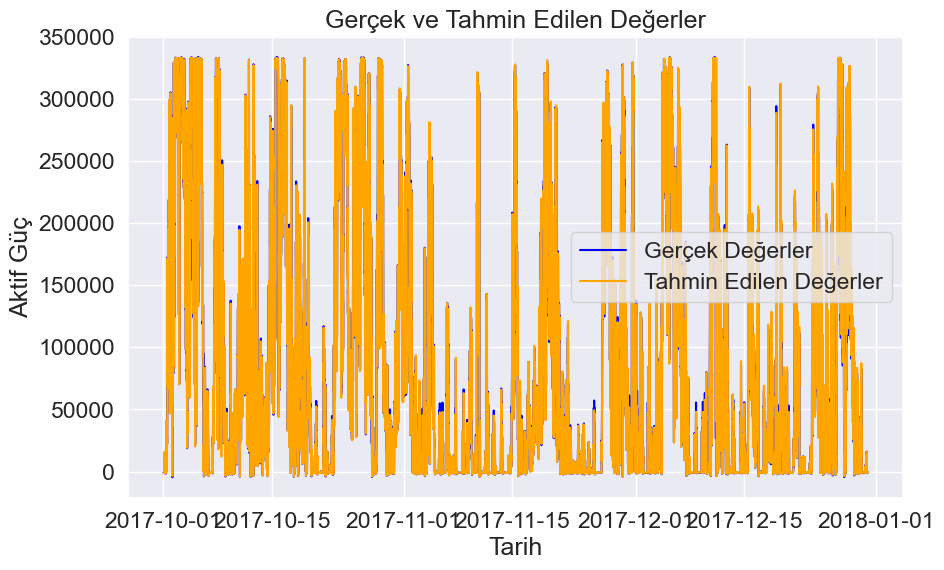

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test["Timestamp"], y_test, label="Gerçek Değerler", color="blue")
plt.plot(test["Timestamp"], y_pred, label="Tahmin Edilen Değerler", color="orange")
plt.legend()
plt.xlabel("Tarih")
plt.ylabel("Aktif Güç")
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.show()

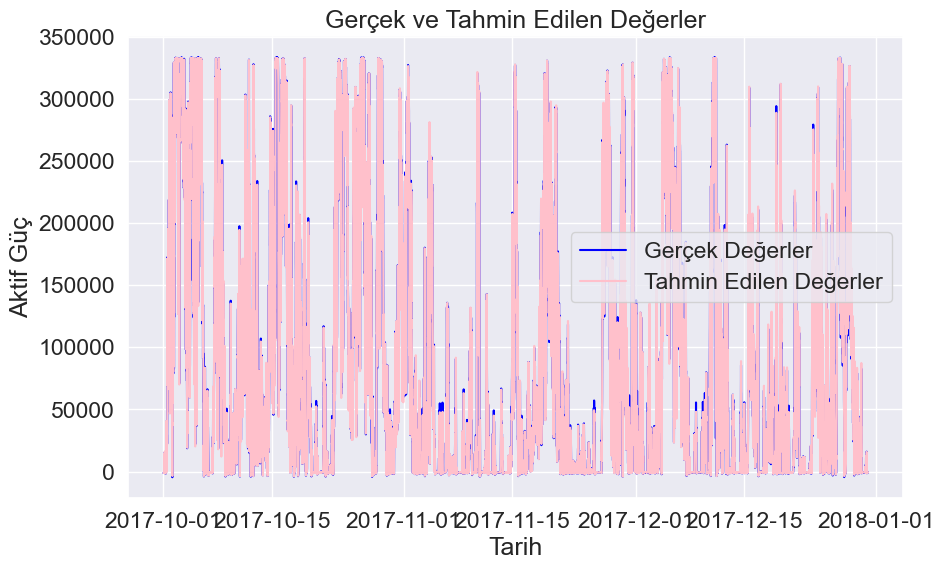

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test["Timestamp"], y_test, label="Gerçek Değerler", color="blue")
plt.plot(test["Timestamp"], y_pred, label="Tahmin Edilen Değerler", color="pink")
plt.legend()
plt.xlabel("Tarih")
plt.ylabel("Aktif Güç")
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.show()

In [ ]:
plot_lgb_importances(lgb_model, plot=True, num=15)

NameError: name 'plot_lgb_importances' is not defined

In [ ]:
def plot_lgb_importances(model, plot=False, num=10):
    gain = model.feature_importance('gain')
    feat_imp = pd.DataFrame({'feature': model.feature_name(),
                             'split': model.feature_importance('split'),
                             'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="gain", y="feature", data=feat_imp[0:25])
        plt.title('feature')
        plt.tight_layout()
        plt.show()
    else:
        print(feat_imp.head(num))
    return feat_imp

In [ ]:
plot_lgb_importances(lgb_model, plot=True, num=15)

AttributeError: 'LGBMRegressor' object has no attribute 'feature_importance'